In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_excel('overdue.xlsx',sheet_name='Data Fin')
data.head()

,Code,Customer Name,Part,Region,Showroom,Area,Territory,OD segment 17,Inst. Size Jan 17,Inst. OD No.,Inst. OD Jan 18,Inst. Outstanding Jan 18,ForMonth
0,L00001,Md.Mostafa Fakir,West,Barisal,Barisal,Barisal,Barguna,Running,101543.000,0.21,21543.0,529258.00,"insert into CreditAnalysis values ('L00001', '..."
1,L00006,MD.Sumon,West,Barisal,Barisal,Barisal,Barguna,Running,33903.000,1.29,43806.0,993090.00,"insert into CreditAnalysis values ('L00006', '..."
2,l00023,"Md,Kamal",West,Barisal,Barisal,Barisal,Barguna,Running,37830.000,0.02,830.0,1097900.00,"insert into CreditAnalysis values ('l00023', '..."
3,L00049,Mr.Babul Chandra,West,Barisal,Barisal,Barisal,Barguna,Running,32943.000,0.00,0.0,988290.00,"insert into CreditAnalysis values ('L00049', '..."
4,L00051,Md.Nannu Farazi,West,Barisal,Barisal,Barisal,Barguna,Running,31940.088,0.00,0.0,958202.64,"insert into CreditAnalysis values ('L00051', '..."


In [2]:
#removing garbage column
data.drop(['ForMonth'],axis=1,inplace=True)
data.head()

,Code,Customer Name,Part,Region,Showroom,Area,Territory,OD segment 17,Inst. Size Jan 17,Inst. OD No.,Inst. OD Jan 18,Inst. Outstanding Jan 18
0,L00001,Md.Mostafa Fakir,West,Barisal,Barisal,Barisal,Barguna,Running,101543.000,0.21,21543.0,529258.00
1,L00006,MD.Sumon,West,Barisal,Barisal,Barisal,Barguna,Running,33903.000,1.29,43806.0,993090.00
2,l00023,"Md,Kamal",West,Barisal,Barisal,Barisal,Barguna,Running,37830.000,0.02,830.0,1097900.00
3,L00049,Mr.Babul Chandra,West,Barisal,Barisal,Barisal,Barguna,Running,32943.000,0.00,0.0,988290.00
4,L00051,Md.Nannu Farazi,West,Barisal,Barisal,Barisal,Barguna,Running,31940.088,0.00,0.0,958202.64


In [3]:
#checking data shape
data.shape

(4063, 12)

In [4]:
#checking for null values
data.isnull().sum()

Code                        0
Customer Name               0
Part                        0
Region                      0
Showroom                    0
Area                        0
Territory                   0
OD segment 17               0
Inst. Size Jan 17           0
Inst. OD No.                0
Inst. OD Jan 18             0
Inst. Outstanding Jan 18    0
dtype: int64

In [6]:
#checking for duplicate rows
data.duplicated().value_counts()

False    4062
True        1
dtype: int64

In [7]:
#checking data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 12 columns):
Code                        4063 non-null object
Customer Name               4063 non-null object
Part                        4063 non-null object
Region                      4063 non-null object
Showroom                    4063 non-null object
Area                        4063 non-null object
Territory                   4063 non-null object
OD segment 17               4063 non-null object
Inst. Size Jan 17           4063 non-null float64
Inst. OD No.                4063 non-null float64
Inst. OD Jan 18             4063 non-null float64
Inst. Outstanding Jan 18    4063 non-null float64
dtypes: float64(4), object(8)
memory usage: 381.0+ KB


In [8]:
#summary statistics
data.describe()

,Inst. Size Jan 17,Inst. OD No.,Inst. OD Jan 18,Inst. Outstanding Jan 18
count,4.063000e+03,4063.000000,4.063000e+03,4.063000e+03
mean,3.444705e+04,2.125469,7.948369e+04,6.873982e+05
std,2.772441e+04,2.446196,9.610132e+04,3.891108e+05
min,0.000000e+00,0.000000,0.000000e+00,1.000000e+03
25%,2.714000e+04,0.000000,0.000000e+00,3.972450e+05
50%,3.521200e+04,1.310000,5.001900e+04,7.249300e+05
75%,4.241100e+04,3.400000,1.240700e+05,9.665500e+05
max,1.251565e+06,29.000000,1.517410e+06,7.509392e+06


In [9]:
list(data.columns)

[u'Code',
 u'Customer Name',
 u'Part',
 u'Region',
 u'Showroom',
 u'Area',
 u'Territory',
 u'OD segment 17',
 u'Inst. Size Jan 17',
 u'Inst. OD No.',
 u'Inst. OD Jan 18',
 u'Inst. Outstanding Jan 18']

In [10]:
#renaming columns 
data.rename(columns={'OD segment 17':'OD_segment_17','Inst. Size Jan 17':'Inst_Size_Jan_17','Inst. OD No.':'Inst_OD_No','Inst. OD Jan 18':'Inst_OD_Jan_18','Inst. Outstanding Jan 18':'Inst_Outstanding_Jan_18'},inplace=True)

In [11]:
data.head()

,Code,Customer Name,Part,Region,Showroom,Area,Territory,OD_segment_17,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18
0,L00001,Md.Mostafa Fakir,West,Barisal,Barisal,Barisal,Barguna,Running,101543.000,0.21,21543.0,529258.00
1,L00006,MD.Sumon,West,Barisal,Barisal,Barisal,Barguna,Running,33903.000,1.29,43806.0,993090.00
2,l00023,"Md,Kamal",West,Barisal,Barisal,Barisal,Barguna,Running,37830.000,0.02,830.0,1097900.00
3,L00049,Mr.Babul Chandra,West,Barisal,Barisal,Barisal,Barguna,Running,32943.000,0.00,0.0,988290.00
4,L00051,Md.Nannu Farazi,West,Barisal,Barisal,Barisal,Barguna,Running,31940.088,0.00,0.0,958202.64


In [12]:
data['OD_segment_17'].unique()

array([u'Running', u'Expire'], dtype=object)

Running    3654
Expire      409
Name: OD_segment_17, dtype: int64


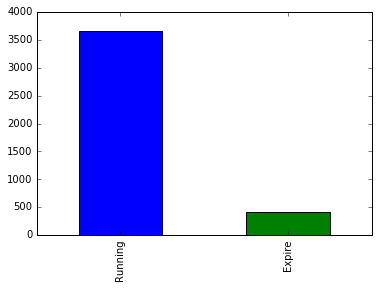

In [13]:
#Status
od_segment_17=data['OD_segment_17'].value_counts()
od_segment_17.plot(kind='bar')
print(od_segment_17)

In [14]:
#separating running customer from expired customer
running_customer=data[data['OD_segment_17']=='Running'].copy()
print(running_customer['OD_segment_17'].value_counts())
running_customer.head()

Running    3654
Name: OD_segment_17, dtype: int64


,Code,Customer Name,Part,Region,Showroom,Area,Territory,OD_segment_17,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18
0,L00001,Md.Mostafa Fakir,West,Barisal,Barisal,Barisal,Barguna,Running,101543.000,0.21,21543.0,529258.00
1,L00006,MD.Sumon,West,Barisal,Barisal,Barisal,Barguna,Running,33903.000,1.29,43806.0,993090.00
2,l00023,"Md,Kamal",West,Barisal,Barisal,Barisal,Barguna,Running,37830.000,0.02,830.0,1097900.00
3,L00049,Mr.Babul Chandra,West,Barisal,Barisal,Barisal,Barguna,Running,32943.000,0.00,0.0,988290.00
4,L00051,Md.Nannu Farazi,West,Barisal,Barisal,Barisal,Barguna,Running,31940.088,0.00,0.0,958202.64


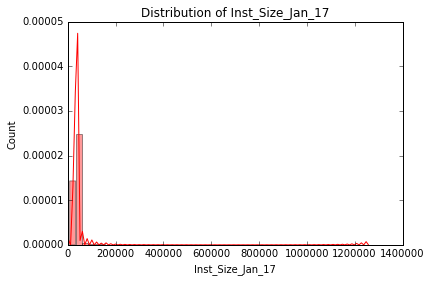

In [15]:
inst_size_jan_17=running_customer['Inst_Size_Jan_17']
#inst_size_jan_17.plot(kind='kde')
plt.figure(figsize=(15,15))
fig,ax1=plt.subplots()
sns.distplot(inst_size_jan_17,color='red')
ax1.set_ylabel('Count')
plt.title('Distribution of Inst_Size_Jan_17')
plt.show()

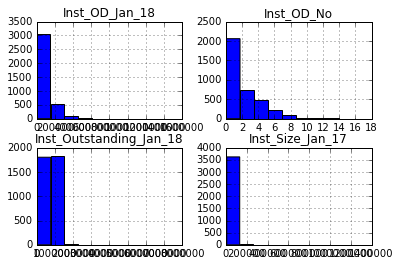

In [16]:
#Histogrm of all numeric feature
plt.figure(figsize=(20,20))
plt.figure(figsize=(15,15))
running_customer.hist()
plt.show()

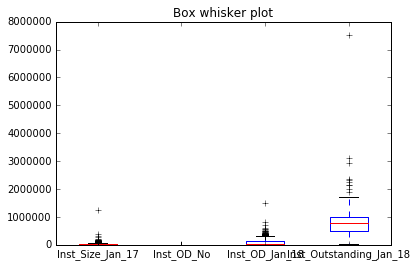

In [17]:
#box whisker plot
plt.figure(figsize=(15,15))
running_customer.iloc[:,8:].plot(kind='box')
plt.title('Box whisker plot')
plt.show()

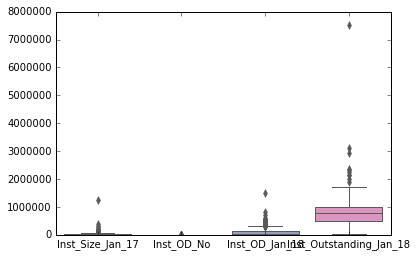

In [18]:
 ax = sns.boxplot(data=running_customer, orient="v", palette="Set2")

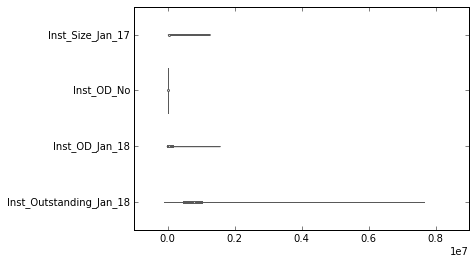

In [19]:
 ax = sns.violinplot(data=running_customer, orient="h", palette="Set2")

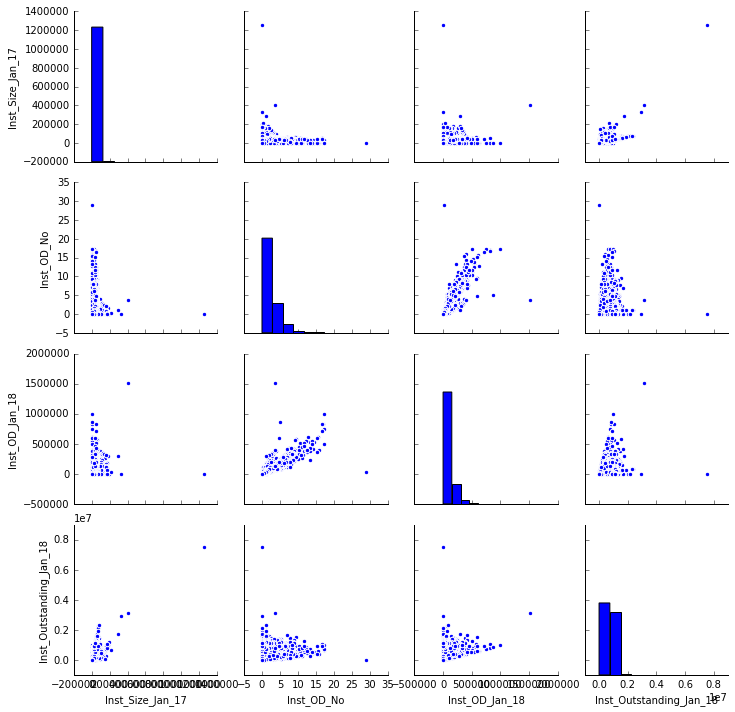

In [20]:
#pair plot
sns.pairplot(data)

count    3654.000000
mean        2.036639
std         2.294535
min         0.000000
25%         0.000000
50%         1.240000
75%         3.330000
max        17.400000
Name: Inst_OD_No, dtype: float64

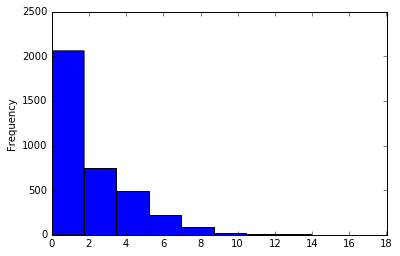

In [21]:
running_customer['Inst_OD_No'].plot(kind='hist')
running_customer['Inst_OD_No'].describe()

count    3.654000e+03
mean     7.617979e+04
std      9.123940e+04
min      0.000000e+00
25%      0.000000e+00
50%      4.726700e+04
75%      1.223550e+05
max      1.517410e+06
Name: Inst_OD_Jan_18, dtype: float64

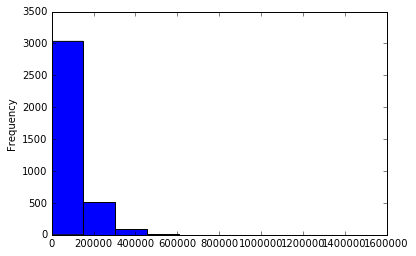

In [22]:
running_customer['Inst_OD_Jan_18'].plot(kind='hist')
running_customer['Inst_OD_Jan_18'].describe()

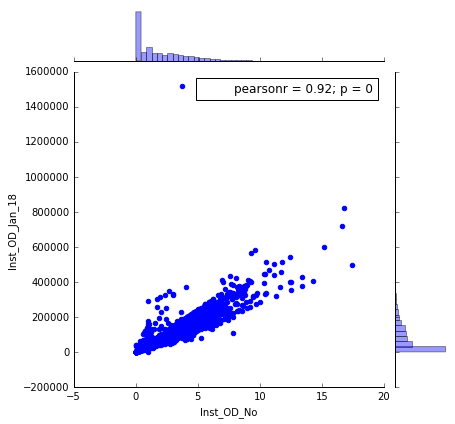

In [23]:
sns.jointplot(x="Inst_OD_No",y="Inst_OD_Jan_18",data=running_customer)

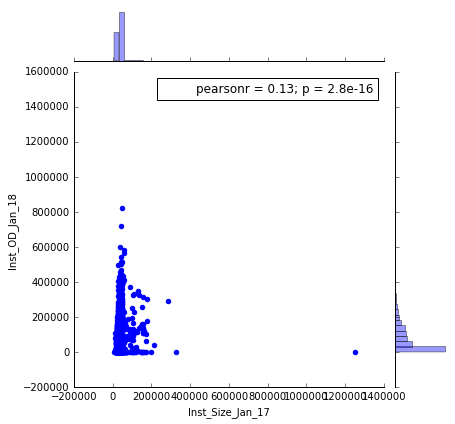

In [24]:
sns.jointplot(x="Inst_Size_Jan_17",y="Inst_OD_Jan_18",data=running_customer)

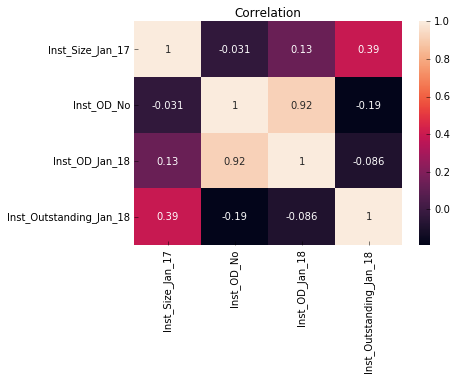

In [25]:
corr=running_customer.corr()
plt.figure()
ax = sns.heatmap(corr,annot=True)
plt.title('Correlation')
#print(corr)

In [26]:
running_customer.head()

,Code,Customer Name,Part,Region,Showroom,Area,Territory,OD_segment_17,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18
0,L00001,Md.Mostafa Fakir,West,Barisal,Barisal,Barisal,Barguna,Running,101543.000,0.21,21543.0,529258.00
1,L00006,MD.Sumon,West,Barisal,Barisal,Barisal,Barguna,Running,33903.000,1.29,43806.0,993090.00
2,l00023,"Md,Kamal",West,Barisal,Barisal,Barisal,Barguna,Running,37830.000,0.02,830.0,1097900.00
3,L00049,Mr.Babul Chandra,West,Barisal,Barisal,Barisal,Barguna,Running,32943.000,0.00,0.0,988290.00
4,L00051,Md.Nannu Farazi,West,Barisal,Barisal,Barisal,Barguna,Running,31940.088,0.00,0.0,958202.64


In [27]:
feature=running_customer[['Inst_OD_No','Inst_OD_Jan_18']]
feature.head()

,Inst_OD_No,Inst_OD_Jan_18
0,0.21,21543.0
1,1.29,43806.0
2,0.02,830.0
3,0.00,0.0
4,0.00,0.0


In [28]:
X=feature.as_matrix()

/home/miraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


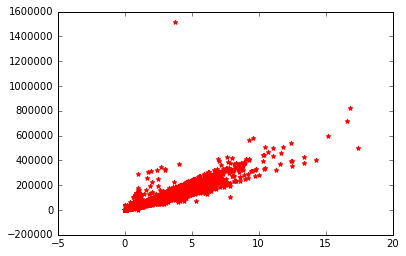

In [29]:
plt.scatter(X[:,0],X[:,1],color='red',marker='*')

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler=StandardScaler()
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [44]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(X[:,0:1])
print("Clusters:",np.unique(clustering.labels_))
s=pd.Series(clustering.labels_)
print(s.value_counts())
print(len(s))
#print("Cluster label:",clustering.labels_)

('Clusters:', array([0, 1, 2]))
1    2244
2     954
0     456
dtype: int64
3654


In [46]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, random_state=0).fit(X[:,0:1])
print("Clusters:",np.unique(clustering.labels_))
s=pd.Series(clustering.labels_)
print(s.value_counts())
print(len(s))

('Clusters:', array([0, 1, 2], dtype=int32))
0    2135
1    1161
2     358
dtype: int64
3654


In [47]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X,clustering.labels_))

0.6288485757705512


In [91]:
#hdbscan algorithm
"""import hdbscan
clustering = hdbscan.HDBSCAN(min_cluster_size=250, gen_min_span_tree=True)
clustering.fit(X)
print("Clusters:",np.unique(clustering.labels_))
s=pd.Series(clustering.labels_)
print(s.value_counts())
print(len(s))"""

('Clusters:', array([-1,  0,  1]))
-1    2053
 1    1164
 0     437
dtype: int64
3654


In [48]:
running_customer['Cluster_Label']=list(clustering.labels_)

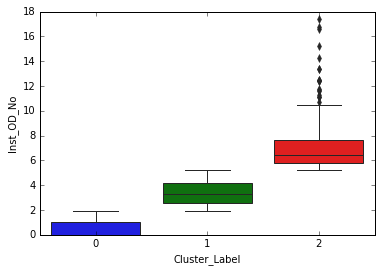

In [49]:
ax=sns.boxplot(x="Cluster_Label",y="Inst_OD_No",data=running_customer)

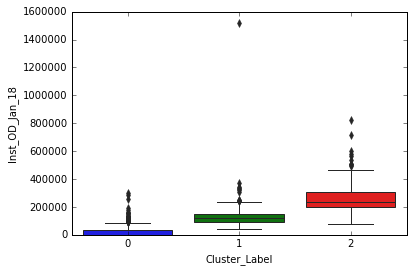

In [50]:
ax=sns.boxplot(x="Cluster_Label",y="Inst_OD_Jan_18",data=running_customer)

In [ ]:
#From the box plot above we can see that cluster 0 is very risky cluster 1 is risky and cluster 2 is good customer cluster

# Cluster Characteristics Analysis

# Cluster 0 Good Customer

In [51]:
running_customer[running_customer['Cluster_Label']==0].describe()

,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18,Cluster_Label
count,2.135000e+03,2135.000000,2135.000000,2.135000e+03,2135.0
mean,3.914681e+04,0.475864,19198.125059,8.206369e+05,0.0
std,3.283933e+04,0.592339,27683.474353,3.838328e+05,0.0
min,8.290000e+03,0.000000,0.000000,1.639800e+04,0.0
25%,2.898350e+04,0.000000,0.000000,5.913060e+05,0.0
50%,3.652100e+04,0.020000,962.000000,8.246826e+05,0.0
75%,4.276100e+04,1.000000,35332.000000,1.081890e+06,0.0
max,1.251565e+06,1.920000,303270.000000,7.509392e+06,0.0


In [35]:
running_customer[running_customer['Cluster_Label']==0].sample(20)

,Code,Customer Name,Part,Region,Showroom,Area,Territory,OD_segment_17,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18,Cluster_Label
2081,M01008,Mohammad Nurul Alam,East,Mymensingh,Gazipur,Tangail,Modhupur,Running,32856.0,4.85,159264.0,520680.0,0
1644,B00941,Md.Mohabbat Ali,East,Chittagong,Comilla,Noakhali,Noakhali,Running,40143.0,6.25,250718.0,411290.0,0
3115,G00990,Mst.Asma Akter Nira,West,Rangpur,Rangpur,Lalmonirhat,Kurigram,Running,26671.0,5.46,145736.0,519130.0,0
3818,d00738,Md. Rayhan Uddin,East,Sylhet,Sylhet,Hobiganj,Hobiganj,Running,24609.0,7.44,183090.0,675270.0,0
3787,d00543,Md. Ajman Ullah,East,Sylhet,Sylhet,Hobiganj,Hobiganj,Running,28144.0,5.70,160456.0,329320.0,0
3876,d00557,Nurujjaman,East,Sylhet,Sylhet,Sylhet,Sylhet-1,Running,39227.0,6.63,260221.0,534810.0,0
2756,F00864,Md. Waliullah,West,Rajshahi,Bogra,Rajshahi,Chapainawabgonj 2,Running,45161.0,7.53,340008.0,430330.0,0
3896,d00609,Jabel Enterprise Pro-Md.,East,Sylhet,Sylhet,Sylhet,Sylhet-1,Running,39226.0,5.76,226068.0,696780.0,0
70,N01374,Md Shajahan Khan,West,Barisal,Jessore,Barisal,Barisal,Running,29759.0,5.64,167831.0,792770.0,0
348,B01060,Md.Sufi Ahammad,East,Dhaka,Comilla,Comilla,Comilla-2,Running,26573.0,4.85,128876.0,607190.0,0


# Cluster 1 Risky Customer

In [52]:
running_customer[running_customer['Cluster_Label']==1].describe()

,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18,Cluster_Label
count,1161.000000,1161.000000,1.161000e+03,1.161000e+03,1161.0
mean,37320.397933,3.364040,1.249425e+05,6.606879e+05,1.0
std,14887.261695,0.926916,6.034104e+04,2.888573e+05,0.0
min,16432.000000,1.930000,4.189000e+04,1.317680e+05,1.0
25%,30413.000000,2.590000,9.056000e+04,4.214200e+05,1.0
50%,38079.000000,3.260000,1.180400e+05,6.477000e+05,1.0
75%,42761.000000,4.150000,1.512420e+05,8.572700e+05,1.0
max,403630.000000,5.200000,1.517410e+06,3.131930e+06,1.0


In [37]:
running_customer[running_customer['Cluster_Label']==1].sample(20)

,Code,Customer Name,Part,Region,Showroom,Area,Territory,OD_segment_17,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18,Cluster_Label
926,S01525,Md. Motaleb Hosen,West,Dinajpur,Dinajpur,Panchagarh,Panchagarh-2,Running,20290.0,0.00,0.0,346500.0,1
2737,F01721,Mst. Paruli Khatun,West,Rajshahi,Bogra,Natore,Pabna,Running,34122.0,0.00,0.0,978660.0,1
1767,N01268,Md Abdul Manan,West,Jessore,Jessore,Jessore,Jessore,Running,32684.0,0.84,27524.0,452416.0,1
698,S01500,Md. Abdul Karim,West,Dinajpur,Dinajpur,Dinajpur,Dinajpur,Running,34165.0,1.86,63645.0,644450.0,1
3542,g01519,Md.Mosiar Rahman,West,Rangpur,Rangpur,Lalmonirhat,Nilphamari,Running,17453.0,0.00,0.0,413590.0,1
1803,N01513,Md Mobashir Hossen,West,Jessore,Jessore,Jessore,Jessore,Running,30631.0,0.00,0.0,918930.0,1
1643,B00897,Md.Jakir Hossain,East,Chittagong,Comilla,Noakhali,Noakhali,Running,43197.0,0.00,0.0,22094.0,1
2210,m01337,Md.Mamun,East,Mymensingh,Gazipur,Kishoreganj,Kishoreganj,Running,25634.0,0.71,18170.0,351412.0,1
3731,g01505,Md.Lokman,West,Rangpur,Rangpur,Rangpur,Rangpur-2,Running,27097.0,0.35,9397.0,795210.0,1
3629,G01395,Md.Faizar Rahman,West,Rangpur,Rangpur,Rangpur,Rangpur-1,Running,26398.0,1.03,27194.0,739940.0,1


# Cluster 2 Very Risky Customer

In [53]:
running_customer[running_customer['Cluster_Label']==2].describe()

,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18,Cluster_Label
count,358.000000,358.000000,358.000000,3.580000e+02,358.0
mean,36455.175978,7.039832,257862.262570,6.402212e+05,2.0
std,7536.830758,1.892971,92293.883498,2.411857e+05,0.0
min,13435.000000,5.210000,76440.000000,1.342800e+05,2.0
25%,30445.500000,5.782500,196746.750000,4.551925e+05,2.0
50%,38151.500000,6.480000,238527.000000,6.124510e+05,2.0
75%,42403.000000,7.680000,305330.000000,7.901325e+05,2.0
max,61086.000000,17.400000,820100.000000,1.647180e+06,2.0


In [54]:
running_customer[running_customer['Cluster_Label']==2].sample(20)

,Code,Customer Name,Part,Region,Showroom,Area,Territory,OD_segment_17,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18,Cluster_Label
321,B01009,Md.Shahjahan Bhuyan,East,Dhaka,Comilla,Lakshmipur,Chandpur,Running,31416.0,7.04,221320.0,535480.0,2
3209,G00786,Md.Mominul Islam,West,Rangpur,Rangpur,Lalmonirhat,Lalmonirhat-1,Running,43197.0,16.60,719622.0,892410.0,2
2498,F00894,Md. Ashraful Islam,West,Rajshahi,Bogra,Naogaon,Naogaon-1,Running,31896.0,6.80,216796.0,344380.0,2
1530,B00959,Md.Mostak Hossain,East,Chittagong,Comilla,Feni,Fatikchori,Running,27236.0,7.54,205484.0,341664.0,2
441,M00940,Md.Shariful Islam,East,Dhaka,Gazipur,Dhaka,Manikganj,Running,32507.0,6.74,219168.0,414210.0,2
3208,G00784,Md.Esa Bapary,West,Rangpur,Rangpur,Lalmonirhat,Lalmonirhat-1,Running,42379.0,8.24,349354.0,518870.0,2
3663,G00929,Md.Shah Alam,West,Rangpur,Rangpur,Rangpur,Rangpur-2,Running,27980.0,8.24,230620.0,538400.0,2
3115,G00990,Mst.Asma Akter Nira,West,Rangpur,Rangpur,Lalmonirhat,Kurigram,Running,26671.0,5.46,145736.0,519130.0,2
201,N01357,Md Samad Molla (02),West,Barisal,Jessore,Faridpur,Faridpur,Running,36622.0,6.02,220598.0,989660.0,2
3205,G00749,Md.Momitul Islam,West,Rangpur,Rangpur,Lalmonirhat,Lalmonirhat-1,Running,23889.0,6.47,154581.0,200685.0,2


In [55]:
running_customer['Cluster_Label'].replace({0:'Good',1:'Risky',2:'Very Risky'},inplace=True)

In [56]:
running_customer.sample(20)

,Code,Customer Name,Part,Region,Showroom,Area,Territory,OD_segment_17,Inst_Size_Jan_17,Inst_OD_No,Inst_OD_Jan_18,Inst_Outstanding_Jan_18,Cluster_Label
1308,S01977,Md. Sukku,West,Dinajpur,Dinajpur,Dinajpur,Setabganj,Running,43197.0,2.00,86394.0,1295910.0,Risky
334,B00898,Md. Eman Hossain,East,Dhaka,Comilla,Comilla,Comilla-1,Running,28296.0,14.30,406288.0,460897.0,Very Risky
37,N01277,Md Babor Talukder,West,Barisal,Jessore,Barisal,Barguna,Running,45117.0,5.46,246287.0,1103510.0,Very Risky
839,S01655,Md. Masud Rana,West,Dinajpur,Dinajpur,Panchagarh,Panchagarh-1,Running,42762.0,2.25,96334.0,1079860.0,Risky
2387,F01093,Md. Mainul Islam,West,Rajshahi,Bogra,Rajshahi,Chapainawabgonj 1,Running,24653.0,0.00,0.0,287590.0,Good
1993,N01482,Md Sohel Rana,West,Jessore,Jessore,Chuadanga,Meherpur,Running,30151.0,1.31,39604.0,823530.0,Good
1471,S01050,Md. Abbas Ali,West,Dinajpur,Dinajpur,Thakurgaon,Thakurgaon-2,Running,45160.0,2.40,108160.0,288800.0,Risky
2098,M01093,Hosain Robbani,East,Mymensingh,Gazipur,Tangail,Modhupur,Running,26835.0,0.00,0.0,651050.0,Good
2357,m01500,Reza,East,Mymensingh,Gazipur,Tangail,Tangail,Running,28100.0,0.00,0.0,813000.0,Good
836,S01631,Md. Moksed Ali,West,Dinajpur,Dinajpur,Panchagarh,Panchagarh-1,Running,26835.0,3.23,86680.0,677050.0,Risky


In [ ]:
running_customer.to_excel('Customer_Cluster')

In [57]:
writer = pd.ExcelWriter('Customer_Cluster.xlsx')
running_customer.to_excel(writer,'Sheet1')
running_customer[running_customer['Cluster_Label']=='Very Risky'].to_excel(writer,'Sheet2')
writer.save()

In [80]:
X

array([[0.01206897, 0.01419722],
       [0.07413793, 0.02886893],
       [0.00114943, 0.00054698],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [83]:
clustering.predict(X[2:4,:])

array([1, 1], dtype=int32)